In [1]:
from matplotlib import pyplot as plt
import F5Utils
from collections import Counter
import itertools
import re

In [2]:
#TODO: Add more files
#TODO: Get filepath smarter
files = ["../somedata/multifast5/umi10000bins/batch0.fast5", "../somedata/multifast5/umi10001bins/batch0.fast5", "../somedata/multifast5/umi10002bins/batch0.fast5"]
reads = []
for f in files:
    n = next(F5Utils.getReads(f))
    reads.append(str(n[0]).split("\\n")[1])   

In [3]:
file = "../useful_files/zymo-ref-uniq_2019-03-15.fa"
with open(file, 'r') as f:
    data = f.read()
regex = re.compile('>.*\\n')
data = regex.split(data)
ref_data = [d.replace('\n', '') for d in data[1:]]

In [4]:
def get_mers(mer_size, reads):
    all_mers = itertools.product(["A", "C", "G", "T"], repeat=mer_size)
    all_mers = [''.join(item) for item in all_mers]
    possible_mers_count = len(all_mers)
    
    mers = []
    for read in reads:
        mers.extend(read[i:i+mer_size] for i in range(0, len(read)-mer_size))

    mer_dict = dict(Counter(mers))
    unseen = set(all_mers)-set(mer_dict.keys())
    
    sorted_mer_list = sorted(mer_dict.items(), key=lambda item: item[1], reverse=True)
    
    return all_mers, possible_mers_count, sorted_mer_list, unseen

In [5]:
def plot_mers(sorted_mer_list, mer_size, unseen, possible_mers_count):
    names = [i[0] for i in sorted_mer_list]
    values = [i[1] for i in sorted_mer_list]  
    
    plt.bar(names, values)
    plt.savefig('curve.png')
    plt.show()
    print(f"Unseen {mer_size}-mers = {len(unseen)} of {possible_mers_count} ({len(unseen)/possible_mers_count*100}%)")
    print(unseen)
    print(f"Most seen {mer_size}-mers")
    print(sorted_mer_list[:10])
    print(f"Least seen {mer_size}-mers")
    print(list(reversed(sorted_mer_list[-10:])))
    

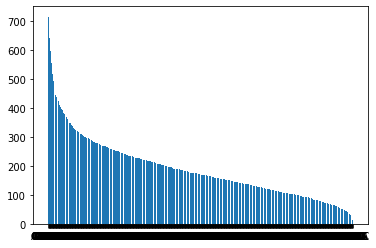

Unseen 5-mers = 0 of 1024 (0.0%)
set()
Most seen 5-mers
[('AAGGT', 716), ('GTGAA', 705), ('GGGGA', 652), ('GAAGG', 644), ('GAAAG', 643), ('GGTGA', 636), ('TGAAA', 617), ('GGGAG', 598), ('CGAAA', 582), ('GGAGG', 565)]
Least seen 5-mers
[('TACGC', 12), ('CAATA', 15), ('CCTAT', 19), ('CTATG', 23), ('TCAAT', 25), ('GTCTA', 26), ('TCTAT', 31), ('CTCAT', 32), ('CTATT', 34), ('TTGCG', 35)]


In [6]:
mer_size = 5

all_mers, possible_mers_count, sorted_mer_list, unseen = get_mers(mer_size, ref_data)
plot_mers(sorted_mer_list, mer_size, unseen, possible_mers_count)

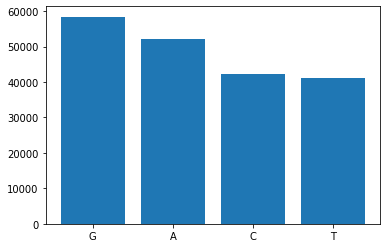

Unseen 1-mers = 0 of 4 (0.0%)
set()
Most seen 1-mers
[('G', 58413), ('A', 52266), ('C', 42290), ('T', 41047)]
Least seen 1-mers
[('T', 41047), ('C', 42290), ('A', 52266), ('G', 58413)]


In [7]:
mer_size = 1

all_mers, possible_mers_count, sorted_mer_list, unseen = get_mers(mer_size, ref_data)
plot_mers(sorted_mer_list, mer_size, unseen, possible_mers_count)

In [10]:
len(ref_data)


44

In [9]:
len(reads)

3